In [1]:
%matplotlib inline

# Imports
import datetime
import dateutil.parser
import matplotlib.pyplot as plt
import numpy
import os
import pandas
import re
import scipy.stats
import seaborn
import string

# sklearn
import sklearn
import sklearn.tree
import sklearn.utils

# Style
seaborn.set_style("darkgrid")

In [2]:
# Base directory
base_path = "/data/workspace/law-on-the-market/"

In [3]:
# Read case ticker data
case_ticker_df = pandas.read_csv(os.path.join(base_path, "data", "events", "case_ticker_data.csv"))
case_ticker_df.columns = ["case", "case_disposition", "case_name",
                         "date_argument", "date_decision", "docket",
                         "issue", "issue_area", "law_type", "lc_disagreement",
                         "petitioner", "respondent", "sct_cite", "case_short_name",
                         "term", "index", "symbol", "vote_margin"]
case_ticker_df["index"].fillna("SPY", inplace=True)
case_ticker_df.drop_duplicates(subset=["case", "index", "symbol"], inplace=True)
case_ticker_df.head().T

0  \
case                                                              1   
case_disposition                                                  4   
case_name         HUNT-WESSON, INC. v. FRANCHISE TAX BOARD OF CA...   
date_argument                                             1/12/2000   
date_decision                                             2/22/2000   
docket                                                      98-2043   
issue                                                         80100   
issue_area                                                        8   
law_type                                                          2   
lc_disagreement                                                   0   
petitioner                                                       25   
respondent                                                        4   
sct_cite                                             120 S.Ct. 1022   
case_short_name              Hunt-Wesson v. Franchise Tax Bd. of CA   
term                                                           1999   
index                                                           SPY   
symbol                                                          CAG   
vote_margin                                                       9   

                                                                  1  \
case                                                              1   
case_disposition                                                  4   
case_name         HUNT-WESSON, INC. v. FRANCHISE TAX BOARD OF CA...   
date_argument                                             1/12/2000   
date_decision                                             2/22/2000   
docket                                                      98-2043   
issue                                                         80100   
issue_area                                                        8   
law_type                                                          2   
lc_disagreement                                                   0   
petitioner                                                       25   
respondent                                                        4   
sct_cite                                             120 S.Ct. 1022   
case_short_name              Hunt-Wesson v. Franchise Tax Bd. of CA   
term                                                           1999   
index                                                           SPY   
symbol                                                          XLP   
vote_margin                                                       9   

                                                                  2  \
case                                                              1   
case_disposition                                                  4   
case_name         HUNT-WESSON, INC. v. FRANCHISE TAX BOARD OF CA...   
date_argument                                             1/12/2000   
date_decision                                             2/22/2000   
docket                                                      98-2043   
issue                                                         80100   
issue_area                                                        8   
law_type                                                          2   
lc_disagreement                                                   0   
petitioner                                                       25   
respondent                                                        4   
sct_cite                                             120 S.Ct. 1022   
case_short_name              Hunt-Wesson v. Franchise Tax Bd. of CA   
term                                                           1999   
index                                                           XLP   
symbol                                                          CAG   
vote_margin                                                       9   

                

In [4]:
# Read case test stats
case_stat_df = pandas.read_csv(os.path.join(base_path, "output", "lotm_event_stats.csv"), index_col=0)
case_stat_df.columns = ["case", "index", "symbol", "estimate", "error", 
                        "t_value", "p_value", "sig", "date_decision", 
                        "sct_cite", "term", "docket", "case_short_name"]
case_stat_df.drop_duplicates(subset=["case", "index", "symbol"], inplace=True)
print(case_stat_df.shape)
case_stat_df.head().T

(1569, 13)


1  \
case                                                  1   
index                                               SPY   
symbol                                              CAG   
estimate                                       0.007026   
error                                          0.050674   
t_value                                        0.138651   
p_value                                        0.889726   
sig                                                 NaN   
date_decision                                 2/22/2000   
sct_cite                                 120 S.Ct. 1022   
term                                               1999   
docket                                          98-2043   
case_short_name  Hunt-Wesson v. Franchise Tax Bd. of CA   

                                                      2  \
case                                                  1   
index                                               SPY   
symbol                                              XLP   
estimate                                      -0.030689   
error                                          0.029094   
t_value                                         -1.0548   
p_value                                        0.291514   
sig                                                 NaN   
date_decision                                 2/22/2000   
sct_cite                                 120 S.Ct. 1022   
term                                               1999   
docket                                          98-2043   
case_short_name  Hunt-Wesson v. Franchise Tax Bd. of CA   

                                                      3               4  \
case                                                  1               2   
index                                               XLP             SPY   
symbol                                              CAG              BP   
estimate                                       0.008083        0.045799   
error                                          0.051425        0.026987   
t_value                                        0.157182         1.69709   
p_value                                        0.875102         0.08968   
sig                                                 NaN               *   
date_decision                                 2/22/2000        3/6/2000   
sct_cite                                 120 S.Ct. 1022  120 S.Ct. 1135   
term                                               1999            1999   
docket                                          98-2043         98-1701   
case_short_name  Hunt-Wesson v. Franchise Tax Bd. of CA   U.S. v. Locke   

                              5  
case                          2  
index                       SPY  
symbol                      CVX  
estimate               0.066548  
error                  0.029139  
t_value                 2.28383  
p_value                0.022381  
sig                          **  
date_decision          3/6/2000  
sct_cite         120 S.Ct. 1135  
term                       1999  
docket                  98-1701  
case_short_name   U.S. v. Locke

In [5]:
# Merge tests and ticker data
all_stat_df = pandas.merge(case_stat_df, case_ticker_df, on=["case", "index", "symbol"], how="left")
all_stat_df.loc[:, "abs_estimate"] = all_stat_df["estimate"].abs()
all_stat_df.head().T

0  \
case                                                               1   
index                                                            SPY   
symbol                                                           CAG   
estimate                                                    0.007026   
error                                                       0.050674   
t_value                                                     0.138651   
p_value                                                     0.889726   
sig                                                              NaN   
date_decision_x                                            2/22/2000   
sct_cite_x                                            120 S.Ct. 1022   
term_x                                                          1999   
docket_x                                                     98-2043   
case_short_name_x             Hunt-Wesson v. Franchise Tax Bd. of CA   
case_disposition                                                   4   
case_name          HUNT-WESSON, INC. v. FRANCHISE TAX BOARD OF CA...   
date_argument                                              1/12/2000   
date_decision_y                                            2/22/2000   
docket_y                                                     98-2043   
issue                                                          80100   
issue_area                                                         8   
law_type                                                           2   
lc_disagreement                                                    0   
petitioner                                                        25   
respondent                                                         4   
sct_cite_y                                            120 S.Ct. 1022   
case_short_name_y             Hunt-Wesson v. Franchise Tax Bd. of CA   
term_y                                                          1999   
vote_margin                                                        9   
abs_estimate                                                0.007026   

                                                                   1  \
case                                                               1   
index                                                            SPY   
symbol                                                           XLP   
estimate                                                   -0.030689   
error                                                       0.029094   
t_value                                                      -1.0548   
p_value                                                     0.291514   
sig                                                              NaN   
date_decision_x                                            2/22/2000   
sct_cite_x                                            120 S.Ct. 1022   
term_x                                                          1999   
docket_x                                                     98-2043   
case_short_name_x             Hunt-Wesson v. Franchise Tax Bd. of CA   
case_disposition                                                   4   
case_name          HUNT-WESSON, INC. v. FRANCHISE TAX BOARD OF CA...   
date_argument                                              1/12/2000   
date_decision_y                                            2/22/2000   
docket_y                                                     98-2043   
issue                                                          80100   
issue_area                                                         8   
law_type                                                           2   
lc_disagreement                                                    0   
petitioner                                                        25   
respondent                                                         4   
sct_cite_y                                            120 S.Ct. 1022   
case_short_name_y             Hunt

In [8]:
# Read SPY data
daily_spy_df = pandas.read_csv(os.path.join(base_path, "data", "equity-daily", "SPY.csv"))
daily_spy_df.loc[:, "Date"] = pandas.to_datetime(daily_spy_df.loc[:, "Date"])
daily_spy_df.set_index("Date", drop=True, inplace=True)
daily_spy_df.sort_index(inplace=True)

In [10]:
buffer = ""
all_stat_df.loc[:, "abnormal_return_day"] = numpy.nan
all_stat_df.loc[:, "abnormal_return_week"] = numpy.nan
all_stat_df.loc[:, "abnormal_return_month"] = numpy.nan

# Iterate through events and load argument data
for row_id, row in all_stat_df.iterrows():
    # Check if data available
    daily_file_name = os.path.join(base_path, "data", "equity-daily", "{0}.csv".format(row["symbol"].upper()))
    if not os.path.exists(daily_file_name):
        print("Unable to find data for: symbol={0}, case={1}".format(row["symbol"], row["case"]))
        continue
        
    # Open stock data
    daily_stock_df = pandas.read_csv(daily_file_name)
    daily_stock_df.loc[:, "Date"] = pandas.to_datetime(daily_stock_df.loc[:, "Date"])
    daily_stock_df.set_index("Date", drop=True, inplace=True)
    daily_stock_df.sort_index(inplace=True)
    
    # Get dates and price
    try:
        date_argument_pre_day = dateutil.parser.parse(row["date_argument"]) - datetime.timedelta(days=1)
        date_argument_pre_week = dateutil.parser.parse(row["date_argument"]) - datetime.timedelta(days=7)
        date_argument_pre_month = dateutil.parser.parse(row["date_argument"]) - datetime.timedelta(days=30)
        date_argument_post_day = dateutil.parser.parse(row["date_argument"]) + datetime.timedelta(days=1)
        date_argument_post_week = dateutil.parser.parse(row["date_argument"]) + datetime.timedelta(days=7)
        date_argument_post_month = dateutil.parser.parse(row["date_argument"]) + datetime.timedelta(days=30)
    except AttributeError as e:
        print((row["symbol"], e))
        continue
    except TypeError as e:
        print((row["symbol"], e))
        continue

    # Check day of
    try:
        price_day = daily_stock_df.loc[dateutil.parser.parse(row["date_argument"])]
    except KeyError as e:
        csv_url = "http://chart.finance.yahoo.com/table.csv?s={0}&a=0&b=2&c=1962&d=1&e=4&f=2017&g=d&ignore=.csv".format(row["symbol"])
        buffer += "wget -O {0}.csv \"{1}\"".format(row["symbol"], csv_url) + "\n"
        print("Unable to find stock data for symbol={0}, date={1}, case={2}".format(row["symbol"],
                                                                                   row["date_argument"],
                                                                                   row["case"]))
        continue
    
    # Get prices
    try:
        price_pre_day = daily_stock_df.loc[daily_stock_df.index <= date_argument_pre_day].tail(1).iloc[0]
        price_pre_week = daily_stock_df.loc[daily_stock_df.index <= date_argument_pre_week].tail(1).iloc[0]
        price_pre_month = daily_stock_df.loc[daily_stock_df.index <= date_argument_pre_month].tail(1).iloc[0]
        price_post_day = daily_stock_df.loc[daily_stock_df.index >= date_argument_post_day].iloc[0]
        price_post_week = daily_stock_df.loc[daily_stock_df.index >= date_argument_post_week].iloc[0]
        price_post_month = daily_stock_df.loc[daily_stock_df.index >= date_argument_post_month].iloc[0]
        stock_range_day_df = daily_stock_df.loc[price_pre_day.name:price_post_day.name]
        spy_range_day_df = daily_spy_df.loc[stock_range_day_df.index]
        stock_range_week_df = daily_stock_df.loc[price_pre_week.name:price_post_week.name]
        spy_range_week_df = daily_spy_df.loc[stock_range_week_df.index]
        stock_range_month_df = daily_stock_df.loc[price_pre_month.name:price_post_month.name]
        spy_range_month_df = daily_spy_df.loc[stock_range_month_df.index]
    except IndexError as e:
        print((row["symbol"], e))
        continue
    
    # Calculate abnormal returns
    #abnormal_return_day = numpy.log(stock_range_df["Adj Close"]).diff().sum() - numpy.log(spy_range_df["Adj Close"]).diff().sum()
    #abnormal_return_day = numpy.log(stock_range_df["Adj Close"]).diff().sum() - numpy.log(spy_range_df["Adj Close"]).diff().sum()
    abnormal_return_day = numpy.log(stock_range_day_df["Adj Close"]).diff().sum() \
        - numpy.log(spy_range_day_df["Adj Close"]).diff().sum()
    abnormal_return_week = numpy.log(stock_range_week_df["Adj Close"]).diff().sum() \
        - numpy.log(spy_range_week_df["Adj Close"]).diff().sum()
    abnormal_return_month = numpy.log(stock_range_month_df["Adj Close"]).diff().sum() \
        - numpy.log(spy_range_month_df["Adj Close"]).diff().sum()
        
    # Set values in
    all_stat_df.loc[row_id, "abnormal_return_day"] = abnormal_return_day
    all_stat_df.loc[row_id, "abnormal_return_week"] = abnormal_return_week
    all_stat_df.loc[row_id, "abnormal_return_month"] = abnormal_return_month
    
print(buffer)

Unable to find stock data for symbol=PLA, date=11/30/1999, case=7
Unable to find data for: symbol=PLAA, case=7
Unable to find stock data for symbol=PLA, date=11/30/1999, case=7
Unable to find data for: symbol=PLAA, case=7
Unable to find stock data for symbol=GM, date=12/7/1999, case=8
Unable to find stock data for symbol=GM, date=12/7/1999, case=8
Unable to find stock data for symbol=GM, date=11/7/2000, case=15
Unable to find stock data for symbol=GM, date=11/7/2000, case=15
Unable to find stock data for symbol=CC, date=11/6/2000, case=17
Unable to find stock data for symbol=CC, date=11/6/2000, case=17
Unable to find data for: symbol=MEA, case=20
Unable to find data for: symbol=MEA, case=20
Unable to find data for: symbol=ENL, case=21
Unable to find data for: symbol=ENL, case=21


/data/workspace/law-on-the-market/env/lib/python3.5/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log
/data/workspace/law-on-the-market/env/lib/python3.5/site-packages/pandas/core/algorithms.py:1630: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
/data/workspace/law-on-the-market/env/lib/python3.5/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in log
/data/workspace/law-on-the-market/env/lib/python3.5/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log


Unable to find data for: symbol=TRW, case=24
Unable to find data for: symbol=TRW, case=24
Unable to find stock data for symbol=CZR, date=10/2/2001, case=25
Unable to find stock data for symbol=CZR, date=10/2/2001, case=25
('DD', TypeError('Parser must be a string or character stream, not float',))
('DOW', TypeError('Parser must be a string or character stream, not float',))
('MON', TypeError('Parser must be a string or character stream, not float',))
('SYT', TypeError('Parser must be a string or character stream, not float',))
('XLB', TypeError('Parser must be a string or character stream, not float',))
('XLP', TypeError('Parser must be a string or character stream, not float',))
('XLV', TypeError('Parser must be a string or character stream, not float',))
Unable to find data for: symbol=GWO, case=28
Unable to find data for: symbol=ACI, case=31
Unable to find data for: symbol=BTU, case=31
Unable to find stock data for symbol=CLD, date=11/7/2001, case=31
Unable to find data for: symbol=

Unable to find data for: symbol=LO, case=138
Unable to find data for: symbol=LO, case=138
Unable to find data for: symbol=ENL, case=140
Unable to find data for: symbol=MHFI, case=140
Unable to find data for: symbol=RUK, case=140
Unable to find data for: symbol=ENL, case=140
Unable to find data for: symbol=MHFI, case=140
Unable to find data for: symbol=RUK, case=140
Unable to find stock data for symbol=UBS, date=12/1/2009, case=141
Unable to find stock data for symbol=UBS, date=12/1/2009, case=141
Unable to find stock data for symbol=UBS, date=11/2/2009, case=142
('PNC', TypeError('Parser must be a string or character stream, not float',))
('AXP', TypeError('Parser must be a string or character stream, not float',))
('C', TypeError('Parser must be a string or character stream, not float',))
('V', TypeError('Parser must be a string or character stream, not float',))
('DFS', TypeError('Parser must be a string or character stream, not float',))
('WFC', TypeError('Parser must be a string or

Unable to find data for: symbol=JWA, case=180
Unable to find stock data for symbol=PSO, date=10/29/2012, case=180
Unable to find stock data for symbol=TRI, date=10/29/2012, case=180
Unable to find stock data for symbol=XLY, date=10/29/2012, case=180
Unable to find data for: symbol=JWA, case=180
Unable to find stock data for symbol=PSO, date=10/29/2012, case=180
Unable to find stock data for symbol=TRI, date=10/29/2012, case=180
('CMCSA', TypeError('Parser must be a string or character stream, not float',))
Unable to find data for: symbol=CMCSK, case=183
Unable to find data for: symbol=DTV, case=183
('DISH', TypeError('Parser must be a string or character stream, not float',))
('VZ', TypeError('Parser must be a string or character stream, not float',))
('NFLX', TypeError('Parser must be a string or character stream, not float',))
('XLY', TypeError('Parser must be a string or character stream, not float',))
('VOX', TypeError('Parser must be a string or character stream, not float',))
('X

In [11]:
all_stat_df.shape

(1569, 32)

In [12]:
all_stat_df.loc[:, "abnormal_return_month"].describe()

count    1168.000000
mean        0.008141
std         0.085899
min        -0.291663
25%        -0.033372
50%         0.011916
75%         0.048547
max         0.439171
Name: abnormal_return_month, dtype: float64

In [13]:
all_stat_df.loc[:, "abs_abnormal_return_day"] = all_stat_df.loc[:, "abnormal_return_day"].abs()
all_stat_df.loc[:, "abs_abnormal_return_week"] = all_stat_df.loc[:, "abnormal_return_week"].abs()
all_stat_df.loc[:, "abs_abnormal_return_month"] = all_stat_df.loc[:, "abnormal_return_month"].abs()

In [14]:
all_stat_df["abnormal_return_day"].describe()

count    1168.000000
mean        0.001134
std         0.025088
min        -0.105686
25%        -0.009755
50%        -0.001151
75%         0.007663
max         0.191306
Name: abnormal_return_day, dtype: float64

In [15]:
C1 = all_stat_df.loc[:, ["abnormal_return_day", "abnormal_return_week", "abnormal_return_month",
                    "estimate", "abs_estimate"]].corr()
C1

abnormal_return_day  abnormal_return_week  \
abnormal_return_day               1.000000              0.615535   
abnormal_return_week              0.615535              1.000000   
abnormal_return_month             0.199167              0.452172   
estimate                          0.081724             -0.043022   
abs_estimate                      0.233393              0.181999   

                       abnormal_return_month  estimate  abs_estimate  
abnormal_return_day                 0.199167  0.081724      0.233393  
abnormal_return_week                0.452172 -0.043022      0.181999  
abnormal_return_month               1.000000  0.060645      0.180640  
estimate                            0.060645  1.000000      0.104853  
abs_estimate                        0.180640  0.104853      1.000000

In [16]:
C2 = all_stat_df.loc[:, ["abnormal_return_day", "abnormal_return_week", "abnormal_return_month",
                    "estimate", "abs_estimate"]].corr(method="spearman")
C2

abnormal_return_day  abnormal_return_week  \
abnormal_return_day               1.000000              0.453585   
abnormal_return_week              0.453585              1.000000   
abnormal_return_month             0.147187              0.432481   
estimate                          0.031031             -0.015607   
abs_estimate                      0.085366              0.071351   

                       abnormal_return_month  estimate  abs_estimate  
abnormal_return_day                 0.147187  0.031031      0.085366  
abnormal_return_week                0.432481 -0.015607      0.071351  
abnormal_return_month               1.000000  0.043728      0.091160  
estimate                            0.043728  1.000000     -0.116280  
abs_estimate                        0.091160 -0.116280      1.000000

In [17]:
C3 = all_stat_df.loc[:, ["abs_abnormal_return_day", "abs_abnormal_return_week", "abs_abnormal_return_month",
                    "estimate", "abs_estimate"]].corr()
C3

abs_abnormal_return_day  abs_abnormal_return_week  \
abs_abnormal_return_day                   1.000000                  0.616896   
abs_abnormal_return_week                  0.616896                  1.000000   
abs_abnormal_return_month                 0.374005                  0.536327   
estimate                                  0.122116                  0.149385   
abs_estimate                              0.386834                  0.403502   

                           abs_abnormal_return_month  estimate  abs_estimate  
abs_abnormal_return_day                     0.374005  0.122116      0.386834  
abs_abnormal_return_week                    0.536327  0.149385      0.403502  
abs_abnormal_return_month                   1.000000  0.056583      0.339776  
estimate                                    0.056583  1.000000      0.104853  
abs_estimate                                0.339776  0.104853      1.000000

In [18]:
C4 = all_stat_df.loc[:, ["abs_abnormal_return_day", "abs_abnormal_return_week", "abs_abnormal_return_month",
                    "estimate", "abs_estimate"]].corr(method="spearman")
C4

abs_abnormal_return_day  abs_abnormal_return_week  \
abs_abnormal_return_day                   1.000000                  0.405412   
abs_abnormal_return_week                  0.405412                  1.000000   
abs_abnormal_return_month                 0.250786                  0.417879   
estimate                                  0.061151                  0.116090   
abs_estimate                              0.288358                  0.192646   

                           abs_abnormal_return_month  estimate  abs_estimate  
abs_abnormal_return_day                     0.250786  0.061151      0.288358  
abs_abnormal_return_week                    0.417879  0.116090      0.192646  
abs_abnormal_return_month                   1.000000  0.051309      0.240447  
estimate                                    0.051309  1.000000     -0.116280  
abs_estimate                                0.240447 -0.116280      1.000000

In [19]:
D1 = pandas.concat([C1.tail(2),
               C2.tail(2)], axis=0)
D1.loc[:, ["abnormal_return_day", "abnormal_return_week", "abnormal_return_month"]]

abnormal_return_day  abnormal_return_week  abnormal_return_month
estimate                 0.081724             -0.043022               0.060645
abs_estimate             0.233393              0.181999               0.180640
estimate                 0.031031             -0.015607               0.043728
abs_estimate             0.085366              0.071351               0.091160

In [20]:
print(D1.loc[:, ["abnormal_return_day", "abnormal_return_week", "abnormal_return_month"]].to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  abnormal\_return\_day &  abnormal\_return\_week &  abnormal\_return\_month \\
\midrule
estimate     &             0.081724 &             -0.043022 &               0.060645 \\
abs\_estimate &             0.233393 &              0.181999 &               0.180640 \\
estimate     &             0.031031 &             -0.015607 &               0.043728 \\
abs\_estimate &             0.085366 &              0.071351 &               0.091160 \\
\bottomrule
\end{tabular}



In [21]:
D2 = pandas.concat([C3.tail(2),
               C4.tail(2)], axis=0)
D2.loc[:, ["abs_abnormal_return_day", "abs_abnormal_return_week", "abs_abnormal_return_month"]]

abs_abnormal_return_day  abs_abnormal_return_week  \
estimate                     0.122116                  0.149385   
abs_estimate                 0.386834                  0.403502   
estimate                     0.061151                  0.116090   
abs_estimate                 0.288358                  0.192646   

              abs_abnormal_return_month  
estimate                       0.056583  
abs_estimate                   0.339776  
estimate                       0.051309  
abs_estimate                   0.240447

In [22]:
print(D2.loc[:, ["abs_abnormal_return_day", "abs_abnormal_return_week", "abs_abnormal_return_month"]].to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  abs\_abnormal\_return\_day &  abs\_abnormal\_return\_week &  abs\_abnormal\_return\_month \\
\midrule
estimate     &                 0.122116 &                  0.149385 &                   0.056583 \\
abs\_estimate &                 0.386834 &                  0.403502 &                   0.339776 \\
estimate     &                 0.061151 &                  0.116090 &                   0.051309 \\
abs\_estimate &                 0.288358 &                  0.192646 &                   0.240447 \\
\bottomrule
\end{tabular}



In [23]:
X = pandas.crosstab(all_stat_df.loc[:, "abnormal_return_day"] >= 0.0,
                all_stat_df.loc[:, "estimate"] >= 0.0, normalize=True)
print(X.to_latex())

\begin{tabular}{lrr}
\toprule
estimate &     False &     True  \\
abnormal\_return\_day &           &           \\
\midrule
False               &  0.348630 &  0.303378 \\
True                &  0.171447 &  0.176546 \\
\bottomrule
\end{tabular}



In [24]:
print(X.sum())
print(X.sum(axis=1))

estimate
False    0.520076
True     0.479924
dtype: float64
abnormal_return_day
False    0.652008
True     0.347992
dtype: float64


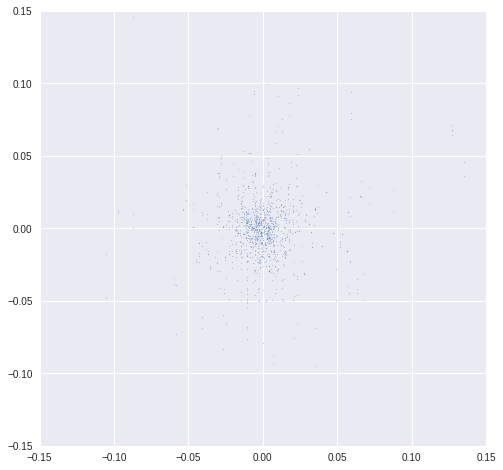

In [25]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
_ = plt.scatter(all_stat_df["abnormal_return_day"],
           all_stat_df["estimate"], alpha=0.25, s=1)
_ = ax.set_xlim(-0.15, 0.15)
_ = ax.set_ylim(-0.15, 0.15)

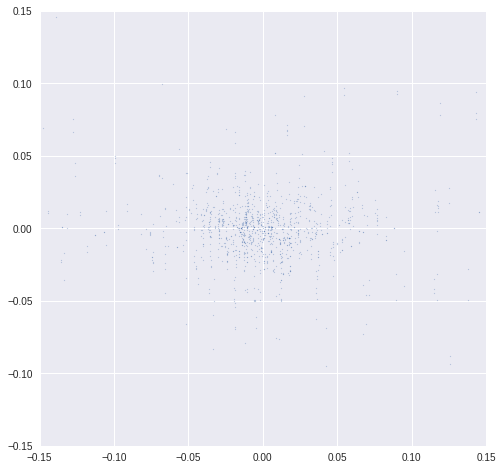

In [26]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
_ = plt.scatter(all_stat_df["abnormal_return_week"],
           all_stat_df["estimate"], alpha=0.25, s=1)
_ = ax.set_xlim(-0.15, 0.15)
_ = ax.set_ylim(-0.15, 0.15)

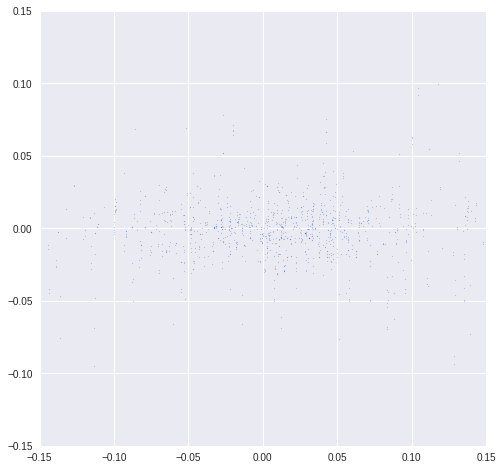

In [27]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
_ = plt.scatter(all_stat_df["abnormal_return_month"],
           all_stat_df["estimate"], alpha=0.25, s=1)
_ = ax.set_xlim(-0.15, 0.15)
_ = ax.set_ylim(-0.15, 0.15)